<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr>
    <th style="background-color:white"> <img src="../media/ccal_b.png" width=350 height=200></th>
  <tr>
<table>

<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/moores.jpg" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/gp.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/johns_hopkins_school_of_medicine.png" width=175 height=175></th> 
    <th style="background-color:white"> <img src="../media/broad.png" width=130 height=130></th> 
  </tr>
</table>

<h1 align="center">DiSCovERing innovative therapies for rare tumors: Overview</h1>  

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
## 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [1]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

Launching NB Project ...
	Exported variable DIR_PROJECT (/Users/kateme/comp_bio/discover_v1).
	Exported variable DIR_TOOLS (/Users/kateme/comp_bio/discover_v1/tools/), and added it to the path.
	Exported variable DIR_DATA (/Users/kateme/comp_bio/discover_v1/data/).
	Exported variable DIR_RESULT (/Users/kateme/comp_bio/discover_v1/results/).
	Exported variable DIR_MEDIA (/Users/kateme/comp_bio/discover_v1/media/).


<hr style="border: none; border-top: 3px solid #88BBEE;">
## 2. Set input and result files/directories
These are the files where the input expression data and the output signature files are stored

Here the expressional signatures are loaded

In [4]:
ccle_signatures = ccal.read_gct(join(DIR_DATA, 'CCLE_Expression_Entrez_2012-04-06_plus_Achilles.SELECTED_TISSUES_PATHWAYS.gct'))
ccle_hNSC_G3_150_UP = ccle_signatures.ix['hNSC_G3_150_UP']
sanger_signatures = ccal.read_gct(join(DIR_DATA, 'Sanger_Expression.out.SELECTED_TISSUES_PATHWAYS.gct'))
sanger_hNSC_G3_150_UP = sanger_signatures.ix['hNSC_G3_150_UP']

Here the drug sensitivity data is loaded

In [5]:
ccle_drug_sensitivity = ccal.read_gct(join(DIR_DATA, 'CCLE_Drug_Sensitivity.gct'))
ctrp_drug_sensitivity = ccal.read_gct(join(DIR_DATA, 'CTRPv2.2_2015_pub.gct'))
sanger_drug_sensitivity = ccal.read_gct(join(DIR_DATA, 'drug_sensitivity.out.SELECTED.gct'))

## 3. Compare medulloblastoma expressional signatures to drug sensitivity data 

The three comparisons noted in the bottom of the figure below will be performed.

<img src="../media/supplementary_fig_1.png" width=800 height=800>

### 3.1 Compare CCLE hNSC signature to CTRP drug sensitivity 

<164418> Target (735 cols) and features (304 cols) have 261 shared columns.
<164418> Dropping features with less than 2 unique values ...
<164418> 	Kept 1 features.
<164418> Scoring (n_jobs=1) ...
<164419> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<164419> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-2] <164419> 	Scoring against permuted

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
alvocidib,-0.375109,0.0148852,1,0.005,0.005,1,0.005,0.005


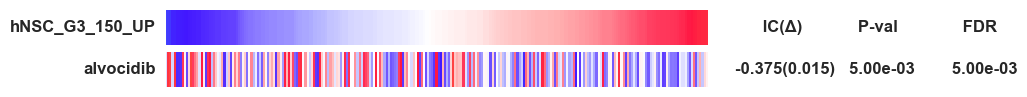

In [7]:
ccal.association.make_association_panel(ccle_hNSC_G3_150_UP, ctrp_drug_sensitivity.ix['alvocidib'],
                                        target_ascending=True, n_jobs=1, n_permutations=200,
                                        n_features=.90,
                                        filepath_prefix=join(DIR_RESULT, 'ccle_sig_ctrp_drug'))

### 3.2 Compare CCLE hNSC signature to CCLE drug sensitivity 

<164524> Target (735 cols) and features (305 cols) have 219 shared columns.
<164524> Dropping features with less than 2 unique values ...
<164524> 	Kept 1 features.
<164524> Scoring (n_jobs=1) ...
<164524> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<164524> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-10] <164524> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-10] <164524> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-10] <164525> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-10] <164525> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-10] <164525> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-10] <164525> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-10] <164525> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-10] <164525> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-10] <164525> 	Scoring against

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
PD-0332991,-0.340489,0.0605545,0.98,0.02,0.02,0.98,0.02,0.02


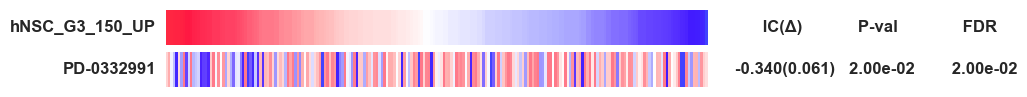

In [12]:
ccal.association.make_association_panel(ccle_hNSC_G3_150_UP,
                                        ccle_drug_sensitivity.ix['PD-0332991'], n_jobs=1, 
                                        n_permutations=200, features_ascending=True, 
                                        n_features=.80, filepath_prefix=join(DIR_RESULT, 'ccle_sig_ccle_drug'))

### 3.3 Compare Sanger hNSC signature to Sanger drug sensitivity

Compare Sanger hNSC signature to drug CGP-60474_B sensitivity.

<164425> Target (458 cols) and features (355 cols) have 179 shared columns.
<164425> Dropping features with less than 2 unique values ...
<164425> 	Kept 1 features.
<164425> Scoring (n_jobs=1) ...
<164426> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<164426> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-6] <164426> 	Scoring against permuted

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
CGP-60474_B,-0.540737,0.0203035,1,0.005,0.005,1,0.005,0.005


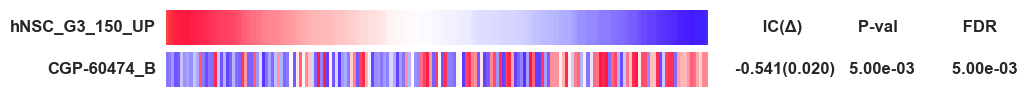

In [9]:
ccal.association.make_association_panel(sanger_hNSC_G3_150_UP, sanger_drug_sensitivity.ix['CGP-60474_B'],
                                        n_permutations=200, features_ascending=True, n_jobs=1,
                                        n_features=.90, filepath_prefix=join(DIR_RESULT, 'sanger_sig_sanger_drug_CGP-60474_B'))

Compare Sanger hNSC signature to drug CGP-082996_B sensitivity.


<164429> Target (458 cols) and features (355 cols) have 179 shared columns.
<164429> Dropping features with less than 2 unique values ...
<164429> 	Kept 1 features.
<164429> Scoring (n_jobs=1) ...
<164429> Computing 0.95 CI for using distributions built by 30 bootstraps ...
<164429> Computing P-value & FDR by scoring against 200 permuted targets (n_jobs=1) ...
[ForkPoolWorker-8] <164429> 	Scoring against permuted target (0/200) ...
[ForkPoolWorker-8] <164429> 	Scoring against permuted target (1/200) ...
[ForkPoolWorker-8] <164429> 	Scoring against permuted target (2/200) ...
[ForkPoolWorker-8] <164429> 	Scoring against permuted target (3/200) ...
[ForkPoolWorker-8] <164429> 	Scoring against permuted target (4/200) ...
[ForkPoolWorker-8] <164429> 	Scoring against permuted target (5/200) ...
[ForkPoolWorker-8] <164430> 	Scoring against permuted target (6/200) ...
[ForkPoolWorker-8] <164430> 	Scoring against permuted target (7/200) ...
[ForkPoolWorker-8] <164430> 	Scoring against permuted

,score,0.95 moe,p-value (forward),p-value (reverse),p-value,fdr (forward),fdr (reverse),fdr
CGP-082996_B,-0.540496,0.0244325,1,0.005,0.005,1,0.005,0.005


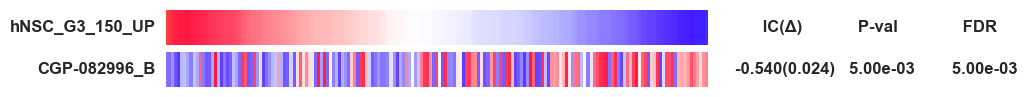

In [10]:
ccal.association.make_association_panel(sanger_hNSC_G3_150_UP, sanger_drug_sensitivity.ix['CGP-082996_B'],
                                        n_permutations=200, features_ascending=True, n_jobs=1,
                                        n_features=.90, filepath_prefix=join(DIR_RESULT, 'sanger_sig_sanger_drug_CGP-082996_B'))